In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Loading Fashion MNIST dataset")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# normalize to be between 0and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

Loading Fashion MNIST dataset...


In [23]:
print("Defining the Neural Network model:")
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Defining the Neural Network model:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
print("Train the model")
# train for 10 epochs
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=2)
print("Model training complete")

Train the model
Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8253 - loss: 0.4951 - val_accuracy: 0.8426 - val_loss: 0.4368
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8660 - loss: 0.3739 - val_accuracy: 0.8410 - val_loss: 0.4421
Epoch 3/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8784 - loss: 0.3341 - val_accuracy: 0.8697 - val_loss: 0.3647
Epoch 4/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8850 - loss: 0.3130 - val_accuracy: 0.8727 - val_loss: 0.3503
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8900 - loss: 0.2944 - val_accuracy: 0.8719 - val_loss: 0.3580
Epoch 6/10
1875/1875 - 4s - 2ms/step - accuracy: 0.8977 - loss: 0.2791 - val_accuracy: 0.8779 - val_loss: 0.3449
Epoch 7/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9000 - loss: 0.2685 - val_accuracy: 0.8724 - val_loss: 0.3582
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9035 - loss: 0.2595 - val_accuracy: 0.8818 - val_loss: 0.3324
Epoch 9/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9068 - loss: 0.2497 - val_acc

In [25]:
print("Evaluating the model :")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')

Evaluating the model :

Test accuracy: 0.8820


Learning curves plot saved to learning_curves_full.png


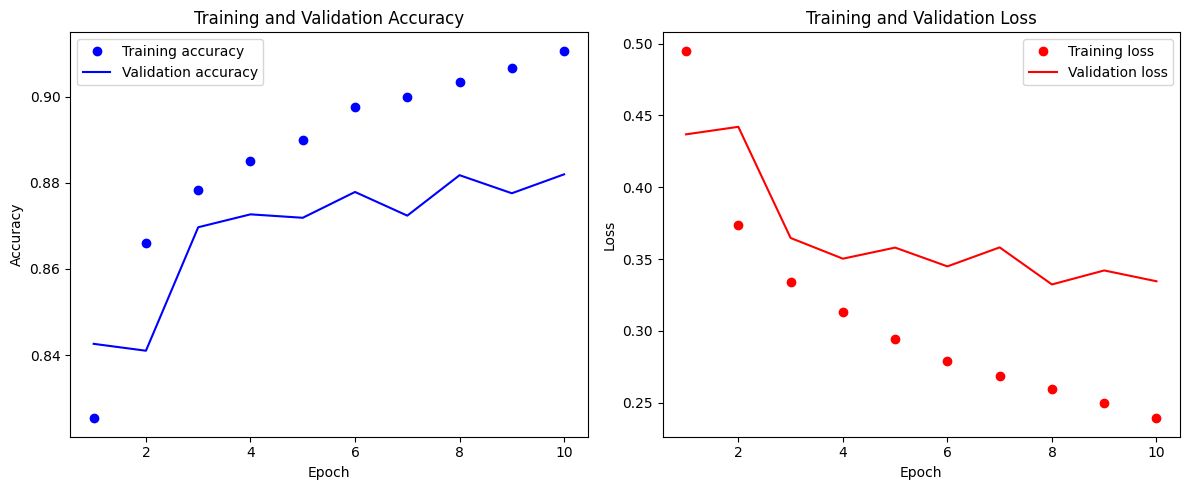

In [26]:
def plot_history(history):
    history_dict = history.history
    epochs = range(1, len(history_dict['accuracy']) + 1)
    
    plt.figure(figsize=(12, 5))
    
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['loss'], 'ro', label='Training loss')
    plt.plot(epochs, history_dict['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('learning_curves_full.png')
    print("Learning curves plot saved to learning_curves_full.png")

plot_history(history)


predictions for classification report
Classification Report
Classification report saved to classification_report_full.md
Generating Confusion Matrix...
Confusion matrix plot saved to confusion_matrix_full.png


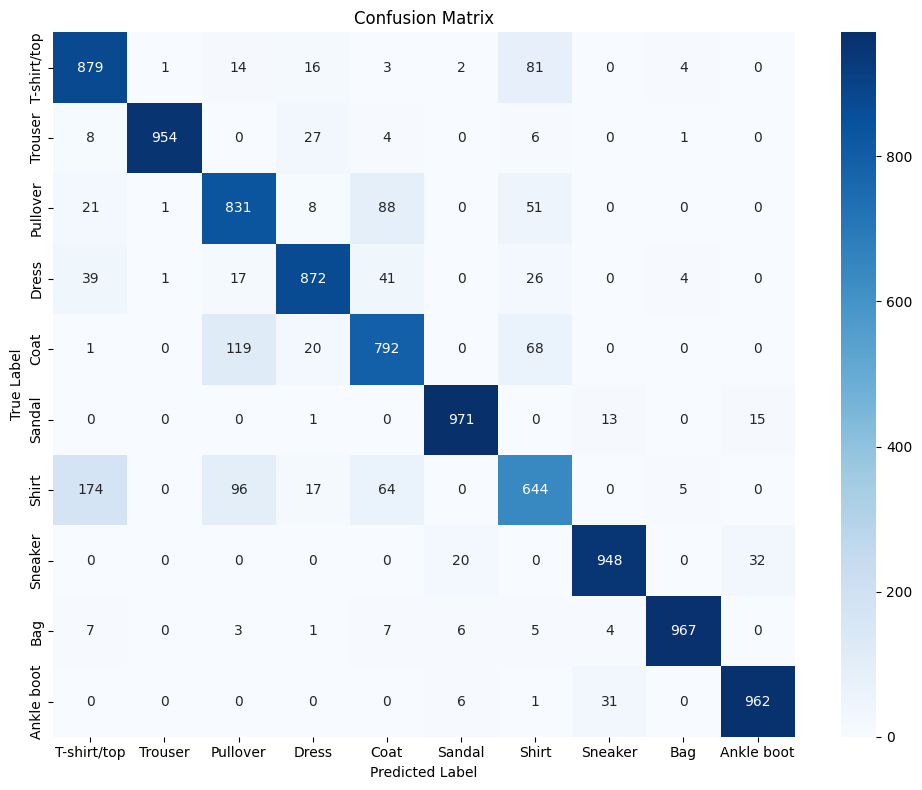

In [27]:
print("predictions for classification report")
predictions = model.predict(test_images, verbose=0)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report")
report = classification_report(test_labels, predicted_labels, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_md = report_df.to_markdown()

with open('classification_report_full.md', 'w') as f:
    f.write(report_md)
print("Classification report saved to classification_report_full.md")

print("Generating Confusion Matrix...")
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix_full.png')
print("Confusion matrix plot saved to confusion_matrix_full.png")

Sample predictions plot saved to sample_predictions_full.png


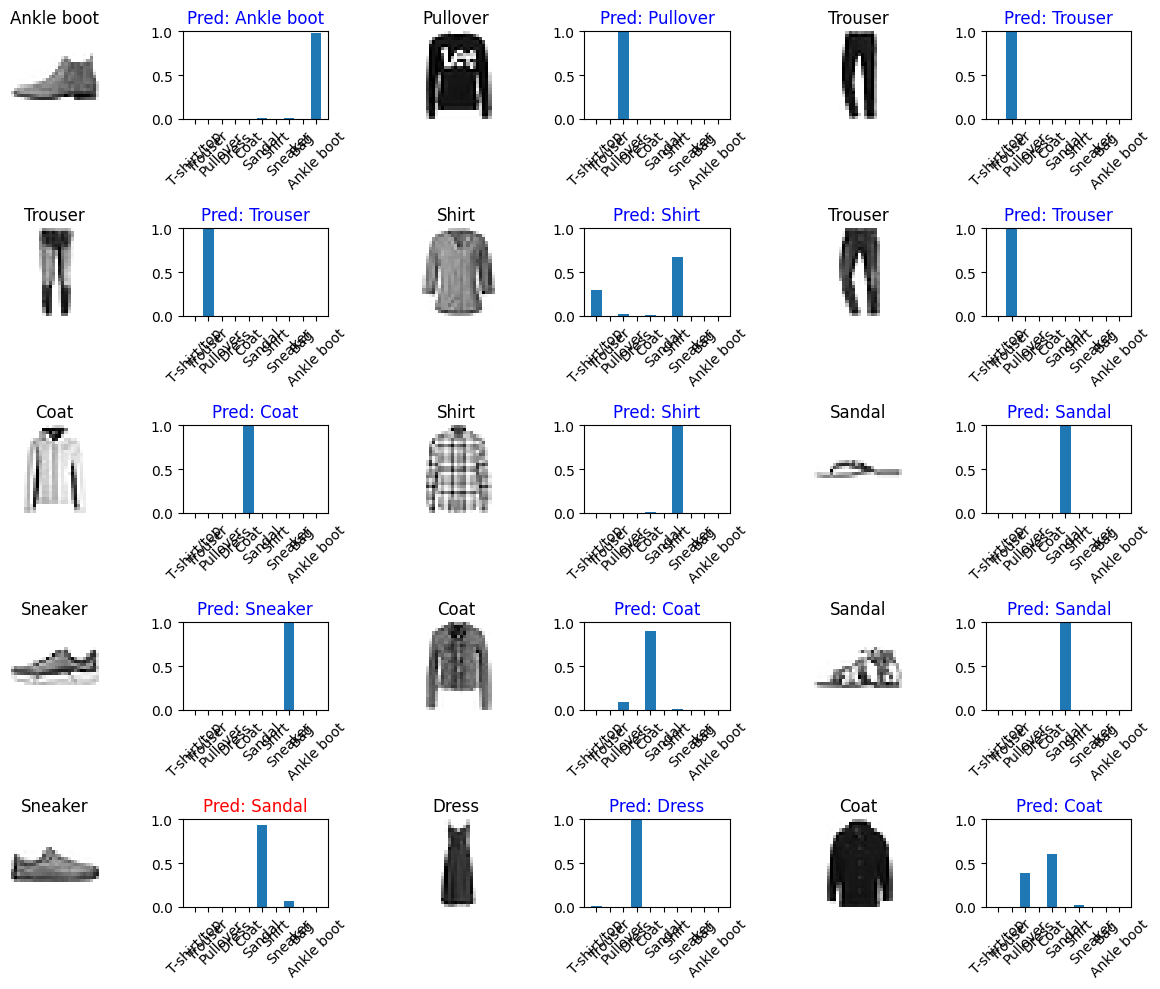

In [28]:

def plot_prediction(images, predictions, true_labels, class_names, num_rows=5, num_cols=3):
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
    
   
    images_to_plot = images[:num_images]
    predictions_to_plot = predictions[:num_images]
    true_labels_to_plot = true_labels[:num_images]
    
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        plt.imshow(images_to_plot[i], cmap=plt.cm.binary)
        plt.title(class_names[true_labels_to_plot[i]])
        plt.axis('off')
        
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plt.bar(range(10), predictions_to_plot[i])
        plt.xticks(range(10), class_names, rotation=45)
        plt.ylim([0, 1])
        predicted_label = np.argmax(predictions_to_plot[i])
        color = 'blue' if predicted_label == true_labels_to_plot[i] else 'red'
        plt.title(f"Pred: {class_names[predicted_label]}", color=color)

    plt.tight_layout()
    plt.savefig('sample_predictions_full.png')
    print("Sample predictions plot saved to sample_predictions_full.png")


plot_predictions(test_images, predictions, test_labels, class_names, num_rows=5, num_cols=3)
